# Project: Investigate a Dataset - [No-Show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
    _ScheduledDay’ tells us on what day the patient set up their appointment.
    _Neighborhood’ indicates the location of the hospital.
    _Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    _Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if      they did not show up.
### Dataset Description 
single csv table table
### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [28]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [6]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
in this section, i will uplaod and discover data, and decide the cleaning steps
### General Properties

In [29]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
df.shape

(110527, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [32]:
df.duplicated().sum()

0

In [33]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [34]:
df['PatientId'].duplicated().sum()

48228

In [37]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [38]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
 
 

In [39]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# remove row with wrong age (-1)
m=df.query('Age=="-1"')
m

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [40]:
df.drop(index=99832, inplace=True)

In [41]:
# rename wrong cloumns words
df.rename(columns={'No-show':'NoShow'},inplace = True)
df.rename(columns={'Hipertension':'Hypertension'},inplace = True)
df.rename(columns={'Handcap':'Handicap'},inplace = True)
df.rename(columns={'Neighbourhood':'Neighborhood'},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
# remove same patients with same no-show status
df.drop_duplicates(['PatientId','NoShow'], inplace =True)
df.shape

(71816, 14)

In [43]:
#remove unessecary coloumns in table
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
 plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 
After finishing cleaning data, the next step is exploration like visualization & statistics.
### (Overall view)

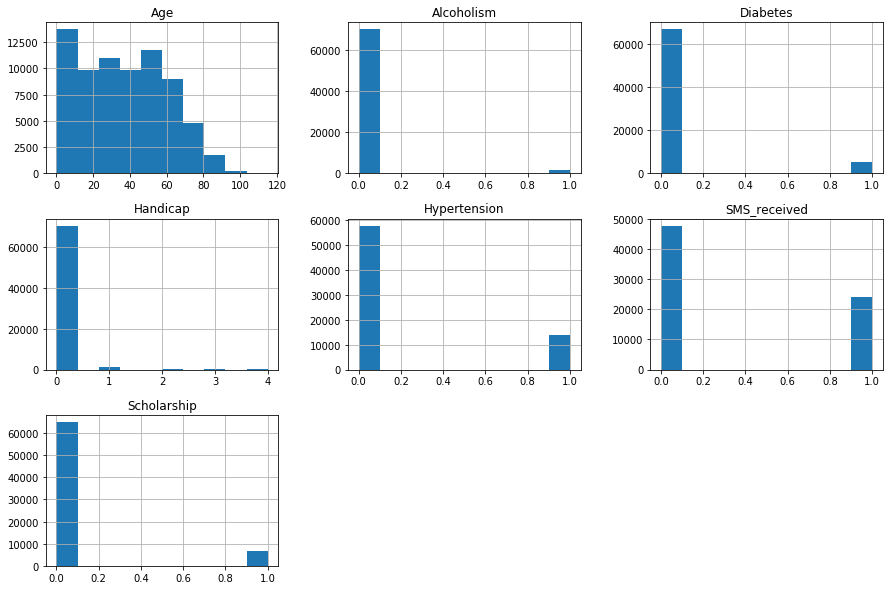

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,10));

###  Qeustions about factors that affect attendance

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

In [45]:
df.NoShow.value_counts()

No     54153
Yes    17663
Name: NoShow, dtype: int64

The number of attendance is greater than the number of absences by three times.

In [46]:
# does gender affect the attendance ?
df.Gender.value_counts()

F    46466
M    25350
Name: Gender, dtype: int64

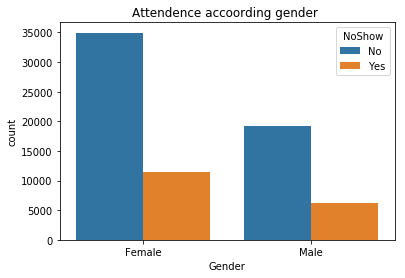

In [47]:
a = snb.countplot(x=df.Gender, hue=df.NoShow, data=df)
a.set_title("Attendence accoording gender ")
x_tickets_labels=['Female', 'Male']
a.set_xticklabels(x_tickets_labels)
plt.show()

The number of females is greater than the number of males in attendance but this has not to effect on attendance percentage.

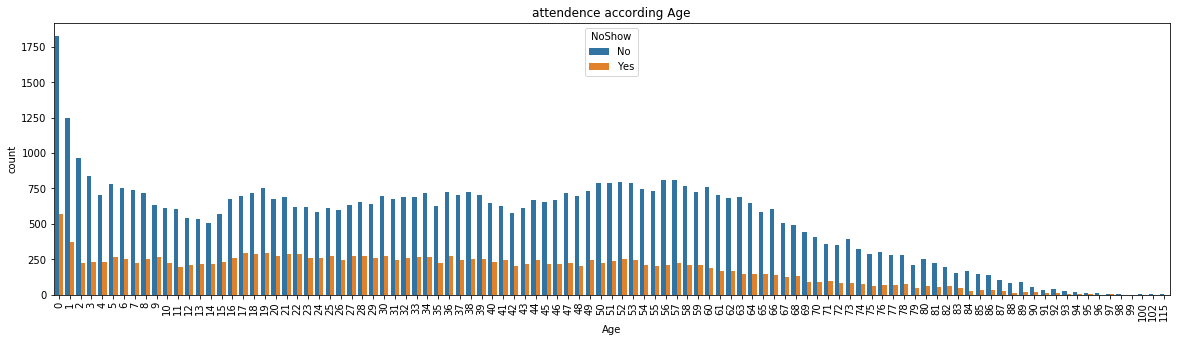

None


In [48]:
# does age affect the attendence ?
def function(df,c):
 plt.figure(figsize=(20,5))
 plt.xticks(rotation=90)
 a = snb.countplot(x=df[c], hue=df.NoShow)
 a.set_title("attendence according "+c)
 plt.show()
print(function(df,'Age'))

Age has effect on attendance specialy in early ages like 0,1 years old.

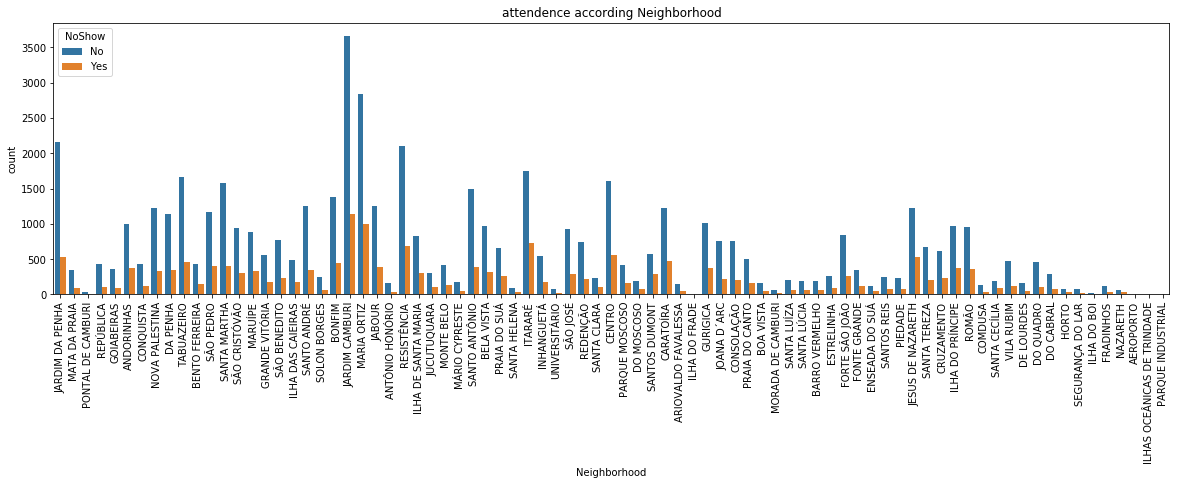

None


In [49]:
# does Neighbourhood affect the attendence ?
print(function(df,'Neighborhood'))

Many significant neighborhoods have a high rate of attendance.

In [21]:
# does Scholarship affect the attendence?
df.Scholarship.value_counts()

0    64955
1     6861
Name: Scholarship, dtype: int64

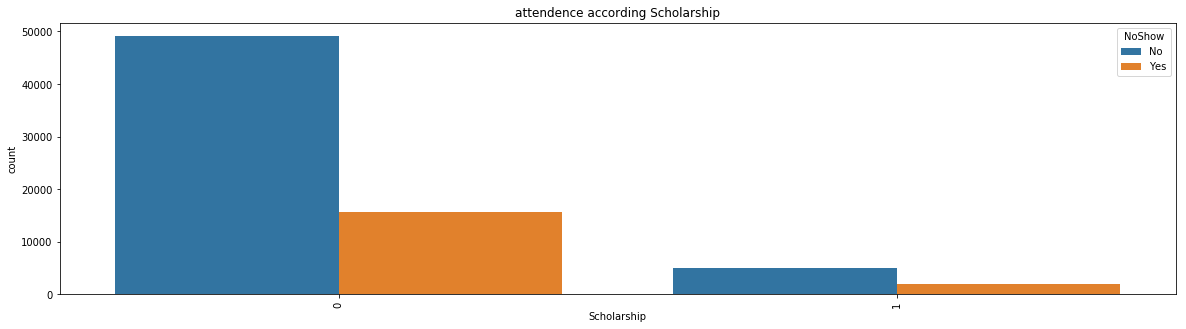

None


In [50]:
print(function(df,'Scholarship'))

From the graph, I get that majority of attendance is form no scholarship status with almost 50000.

In [23]:
# does Diabetes affect the attendence ?
df.Diabetes.value_counts()

0    66720
1     5096
Name: Diabetes, dtype: int64

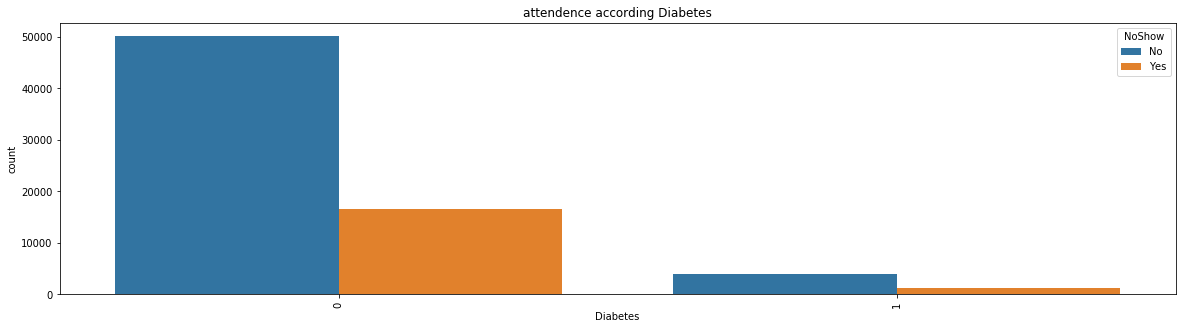

None


In [51]:
print(function(df,'Diabetes'))

From the graph, I get that majority of attendance is form no Diabetes status with almost 50000.

In [25]:
# does Hypertension affect the attendence ?
df.Hypertension.value_counts()

0    57807
1    14009
Name: Hypertension, dtype: int64

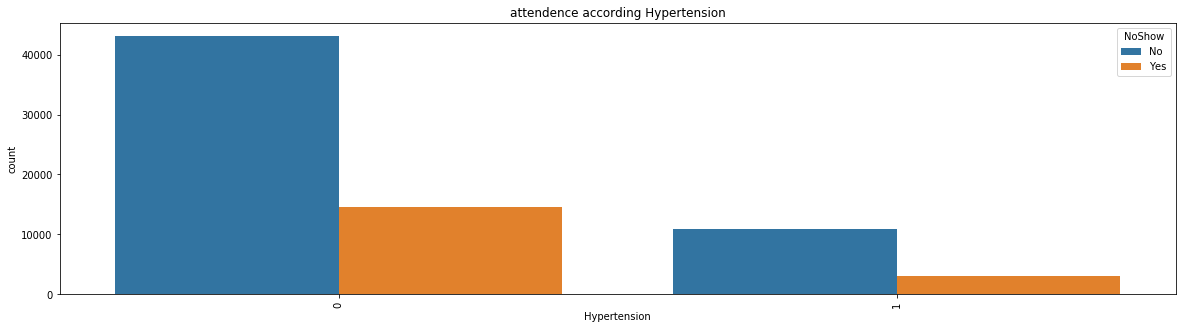

None


In [52]:
print(function(df,'Hypertension'))

From the graph, I get that majority of attendance is form no Hypertension status with more than 40000 patients.

In [56]:
# does Alcoholism affect the attendence ?
df.Alcoholism.value_counts()

0    70018
1     1798
Name: Alcoholism, dtype: int64

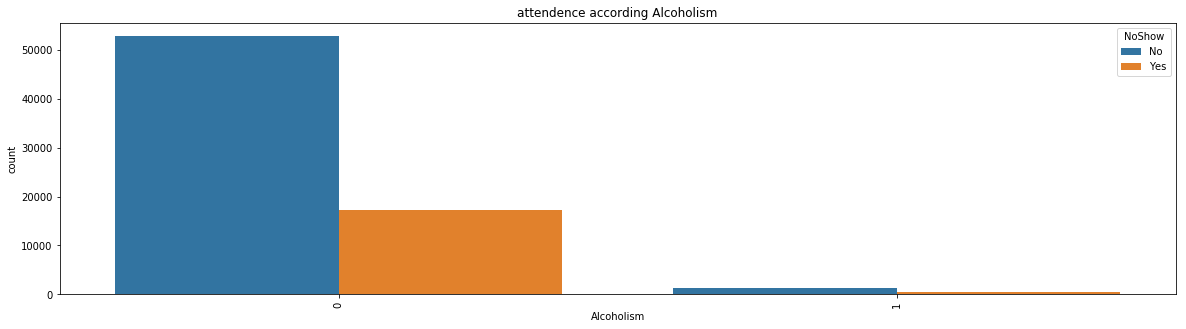

None


In [53]:
print(function(df,'Alcoholism'))

From the graph, I get that majority of attendance is form no Alcoholism status with more than 50000 patinets.

In [55]:
# does Handicapdf affect the attendence ?
df.Handicap.value_counts()

0    70511
1     1178
2      116
3        8
4        3
Name: Handicap, dtype: int64

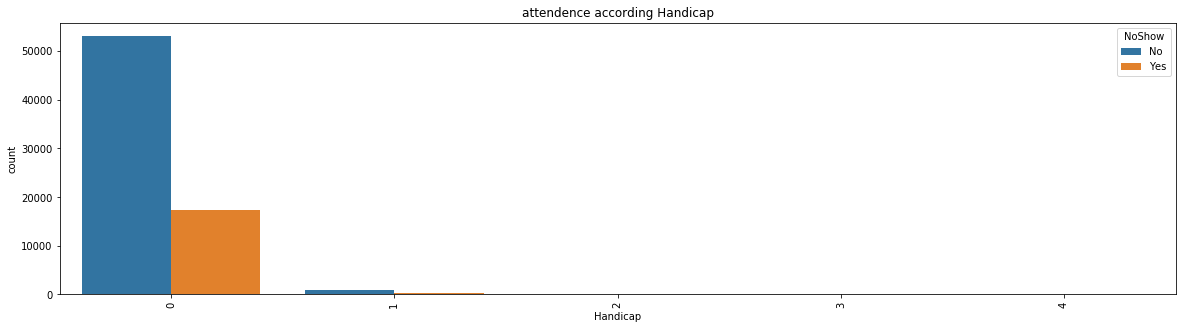

None


In [54]:
print(function(df,'Handicap'))

From the graph, I get that majority of attendance is form no Handicap status with more than 50000 patinets.

In [58]:
# does SMS_received affect the attendence ?
df.SMS_received.value_counts()

0    47717
1    24099
Name: SMS_received, dtype: int64

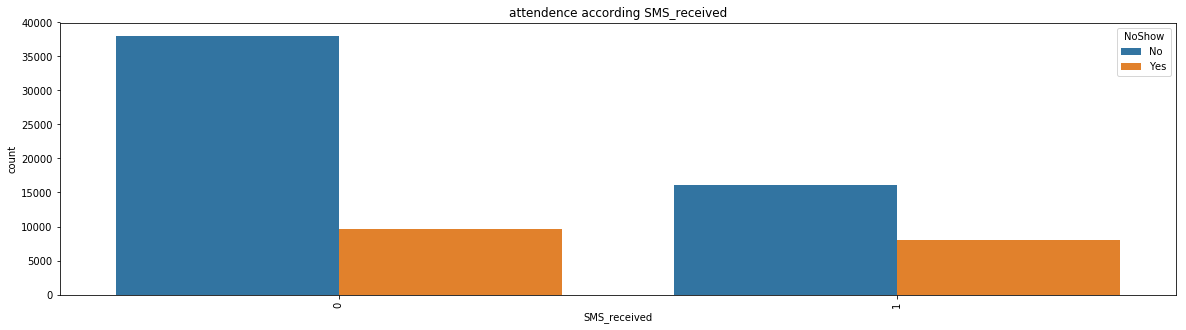

None


In [57]:
print(function(df,'SMS_received'))

From the graph, I get that majority of attendance is form no SMS_received status with more than 35000 patinets.

<a id='conclusions'></a>
## Conclusions
From above visuals, i get that 
Gender has not great effect on attendence.
while Age and Neighbourhood has effect on percentage of attendance.
SMS has not effect on attendence because of number of show patient without sms is greater than number of show patient with sms, so we need to study the SMS cases to enhance the effect on attendance.

limitations:
No clear correlation between attendence & (Gender, Hypertension, Diabetes, Alcoholism, Handicap, Scholarship).
## Submitting your Project 

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0